# **Universidad Nacional de Colombia, Sede Bogotá**
## **Minería de Datos**
### **Prof. Elizabeth León G.**
### **Tema**: Avance 1 de proyecto

###Presentado por: 
###                Juan Andrés Caballero Martínez
###                Katherin Quintero Parra

En un principio se carga el conjunto de datos y se consulta el número de registros y de atributos

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute

datos = pd.read_csv("./brain_stroke.csv")
print('Número de registros = %d' % (datos.shape[0]))
print('Número de atributos = %d' % (datos.shape[1]))
datos

Número de registros = 4981
Número de atributos = 11


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


#1) Rango de valores por atributo:

A continuación se calcula el rango de valores que pueden tomar cada uno de los atributos del conjunto de datos.

In [ ]:
def mayormenor(dato):
  datomenor = dato[0]
  datomayor = dato[0]
  tamano = dato.shape[0]

  for i in range(0,tamano):
    dato_actual = dato[i]
    if dato_actual > datomayor:
      datomayor = dato_actual
    if dato_actual < datomenor:
      datomenor = dato_actual
  return datomenor, datomayor

Rango de valores para el atributo: 'age'



In [ ]:
edad = datos['age']
edad_menor, edad_mayor = mayormenor(edad)
print("Edad menor: "+str(edad_menor))
print("Edad mayor: "+str(edad_mayor))

Edad menor: 0.08
Edad mayor: 108.0


Rango de valores para el atributo: 'hypertension':

Valores binarios, 0 o 1.

Rango de valores para el atributo: 'heart_disease':

Valores binarios, 0 o 1.

Rango de valores para el atributo: 'ever_married':

Valores binarios, 'Yes', 'NO'.

Rango de valores para el atributo: 'work_type':

Valores categóricos: 'Private', 'Self-employed', 'Govt job', 'Children'

Rango de valores para el atributo: 'Residence-type':

Valores binarios, 'Urban', 'Rural'.

Rango de valores para el atributo: 'avg_glucose_level':

In [ ]:
glucosa = datos['avg_glucose_level']
glucosa_menor,glucosa_mayor = mayormenor(glucosa)
print("Glucosa menor: "+str(glucosa_menor))
print("Glucosa mayor: "+str(glucosa_mayor))

Glucosa menor: 55.12
Glucosa mayor: 271.74


Rango de valores para el atributo: 'bmi':

In [ ]:
bmi = datos['bmi']
bmi_menor,bmi_mayor = mayormenor(bmi)
print("BMI menor: "+str(bmi_menor))
print("BMI mayor: "+str(bmi_mayor))

BMI menor: 14.0
BMI mayor: 48.9


Rango de valores para el atributo: 'smoking_status':

Valores categóricos: 'formerly smoked', 'never smoked', 'smokes', 'Unknown'

Rango de valores para el atributo: 'stroke':

Valores binarios, 0 o 1.

#2) Número de valores perdidos
Se consulta el número de valores perdidos por cada atributo del conjunto:

In [ ]:
print('Número de valores perdidos por cada atributo:')
for col in datos.columns:
    print('\t%s: %d' % (col,datos[col].isna().sum()))

Número de valores perdidos por cada atributo:
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	ever_married: 0
	work_type: 0
	Residence_type: 0
	avg_glucose_level: 0
	bmi: 0
	smoking_status: 0
	stroke: 0


#3) Detección de outliers

Dado que la mayoría de los atributos del conjunto de datos son de tipo binario y categóricos, en ellos no sea realiza el proceso de detección de outliers.

Debido a que el atributo de nivel de glucosa contiene información relevante incluso para valores que están 3 desviaciones estándar por encima de la media en pacientes que sufren de diabetes, se decide no hacer filtrado por outliers.

De igual forma, para el atributo del índice de masa corporal BMI se decide  no hacer filtrado por outliers.


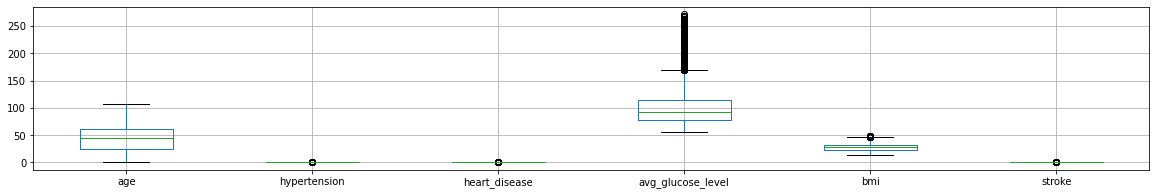

In [ ]:
%matplotlib inline

datos.boxplot(figsize=(20,3))

En cambio, el atributo edad contiene datos inconsistentes como lo son edades dadas en valores decimales, menores a 1 y edades muy grandes del orden de los 110 años. Así que se realiza un filtrado de dichos valores inconsistentes.

In [2]:
datos_mod = datos.drop(datos[datos['age'] > 88].index)
datos_filtrados = datos_mod.drop(datos_mod[datos_mod['age'] < 1].index)
datos_filtrados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Se eliminaron los registros con edades menores a 1 años y mayores a 88 años, resultando ahora 4939 registros.

#4) Eliminación de datos duplicados:

A continuación se detectan los valores duplicados del conjunto de datos

In [ ]:
dups = datos_filtrados.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Se concluye que no existen valores duplicados

#5) Agregación

Para el presente conjunto de datos no es necesario hacer agregación de dimensiones, puesto que cada atributo individual representa una medida específica que no está relacionada con otros atributos.



#6) Muestreo

A continuación se realiza un muestreo sin reemplazamiento del 1% del conjunto de datos.

In [ ]:
datos_muestra = datos_filtrados.sample(frac=0.01, replace=False, random_state=1)
datos_muestra

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3418,Female,42.0,0,0,Yes,Private,Rural,82.24,23.8,formerly smoked,0
1548,Male,6.0,0,0,No,children,Urban,97.46,21.3,Unknown,0
1783,Female,41.0,0,0,Yes,Private,Rural,121.44,20.4,never smoked,0
3147,Female,53.0,1,0,Yes,Private,Urban,240.86,31.9,never smoked,0
3892,Male,33.0,0,0,Yes,Private,Urban,78.43,43.7,smokes,0
4041,Male,60.0,1,0,Yes,Govt_job,Rural,100.20,28.5,smokes,0
1726,Male,80.0,1,1,Yes,Private,Urban,86.68,27.7,formerly smoked,0
4954,Female,79.0,1,0,Yes,Self-employed,Rural,92.43,29.2,never smoked,0
761,Female,54.0,0,0,Yes,Govt_job,Urban,74.23,28.1,formerly smoked,0
4203,Female,46.0,0,0,Yes,Self-employed,Urban,71.12,27.3,never smoked,0


#7) Discretización

7.1) En un principio se hace la discretización de las edades.

67.00    49
80.00    70
49.00    76
79.00    84
81.00    60
         ..
1.56      4
1.88      7
1.24      7
1.48      6
1.32      8
Name: age, Length: 93, dtype: int64

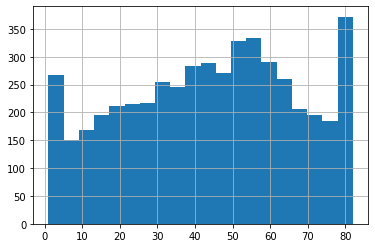

In [ ]:
datos_filtrados['age'].hist(bins=20)
datos_filtrados['age'].value_counts(sort=False)

7.2) Histograma de género

Male      2047
Female    2892
Name: gender, dtype: int64

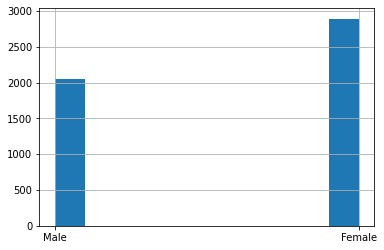

In [ ]:
datos_filtrados['gender'].hist(bins=10)
datos_filtrados['gender'].value_counts(sort=False)

Se puede apreciar que los datos contienen más personas de género femenino que del masculino.

7.3) Histograma de hipertensión

0    4460
1     479
Name: hypertension, dtype: int64

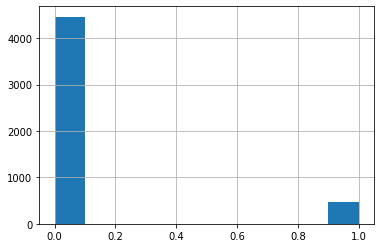

In [ ]:
datos_filtrados['hypertension'].hist(bins=10)
datos_filtrados['hypertension'].value_counts(sort=False)

Se puede apreciar que existen muchas más personas que no sufren de hipertensión comparada con aquella que sí padece dicha enfermedad.

7.4) Histograma de enfermedad del corazón

1     275
0    4664
Name: heart_disease, dtype: int64

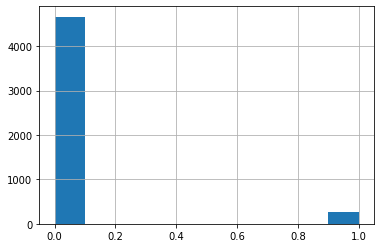

In [ ]:
datos_filtrados['heart_disease'].hist(bins=10)
datos_filtrados['heart_disease'].value_counts(sort=False)

Se aprecia que existe mucho más gente que no sufre de enfermedad del corazón que aquellos que sí la padecen.

7.5) Histograma de estado civil

Yes    3280
No     1659
Name: ever_married, dtype: int64

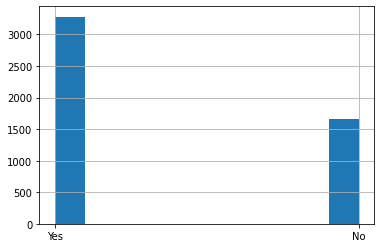

In [ ]:
datos_filtrados['ever_married'].hist(bins=10)
datos_filtrados['ever_married'].value_counts(sort=False)

7.6) Histograma de tipo de trabajo

Private          2860
Self-employed     804
Govt_job          644
children          631
Name: work_type, dtype: int64

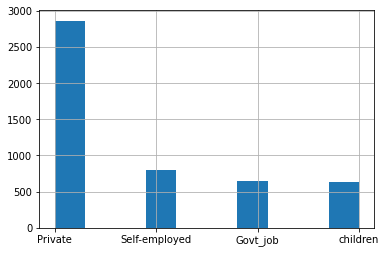

In [ ]:
datos_filtrados['work_type'].hist(bins=10)
datos_filtrados['work_type'].value_counts(sort=False)

Se observa que el tipo de trabajo mayoritario es de tipo privado.

7.7) Histograma de tipo de residencia:

Urban    2509
Rural    2430
Name: Residence_type, dtype: int64

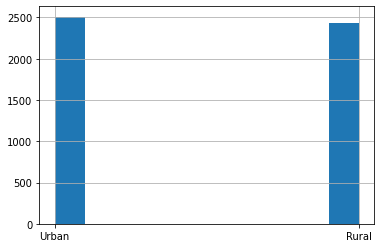

In [ ]:
datos_filtrados['Residence_type'].hist(bins=10)
datos_filtrados['Residence_type'].value_counts(sort=False)

Los tipos de residencia tanto urbanos como rurales son muy similares.

7.8) Histograma de nivel de glucosa promedio:


228.69    1
105.92    1
171.23    1
174.12    1
186.21    1
         ..
84.94     1
215.07    1
191.15    1
95.02     1
83.94     1
Name: avg_glucose_level, Length: 3868, dtype: int64

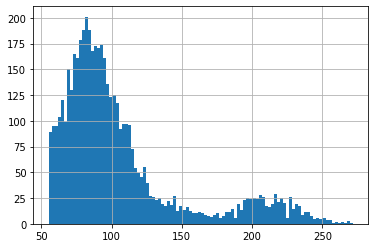

In [3]:
datos_filtrados['avg_glucose_level'].hist(bins=100)
datos_filtrados['avg_glucose_level'].value_counts(sort=False)

La distribución del nivel de glucosa es muy similar a una Chi-cuadrado con los siguientes parámetros:

In [6]:
media_glucosa = datos_filtrados['avg_glucose_level'].mean()
print("Valor de media:  ")
print(media_glucosa)
desviacion_glucosa = datos_filtrados['avg_glucose_level'].std()
print("Valor de desviación estándar:  ")
print(desviacion_glucosa)

Valor de media:  
106.03555780522373
Valor de desviación estándar:  
45.185880584981724


Se aprecia que la mayoría de datos se encuentra entre el rango 70-120, el cual es el límite normal de glucosa para una persona sana.

7.9) Histograma de índice de masa corporal IMC

36.6    14
32.5    22
34.4    18
24.0    28
29.0    29
        ..
46.9     2
47.1     1
48.1     1
46.3     1
14.9     1
Name: bmi, Length: 342, dtype: int64

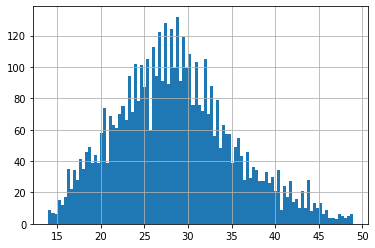

In [ ]:
datos_filtrados['bmi'].hist(bins=100)
datos_filtrados['bmi'].value_counts(sort=False)

Se puede apreciar en el histograma una forma de campana muy similar a una distribución norma, con los siguientes parámetros:

In [7]:
media_glucosa = datos_filtrados['bmi'].mean()
print("Valor de media:  ")
print(media_glucosa)
desviacion_glucosa = datos_filtrados['bmi'].std()
print("Valor de desviación estándar:  ")
print(desviacion_glucosa)

Valor de media:  
28.583822636161166
Valor de desviación estándar:  
6.7476923650735126


7.10) Histograma de estatus de fumador:


formerly smoked     867
never smoked       1838
smokes              776
Unknown            1458
Name: smoking_status, dtype: int64

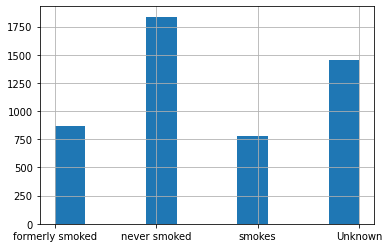

In [ ]:
datos_filtrados['smoking_status'].hist(bins=10)
datos_filtrados['smoking_status'].value_counts(sort=False)

7.11) Histograma de accidente cerebrovascular

1     248
0    4691
Name: stroke, dtype: int64

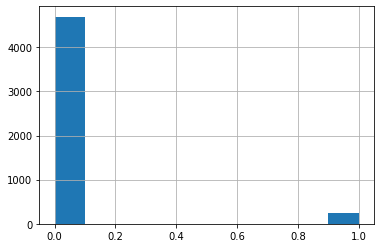

In [ ]:
datos_filtrados['stroke'].hist(bins=10)
datos_filtrados['stroke'].value_counts(sort=False)